## Student Information

Please enter the names and IDs of the two students below:

1. **Name**: [Yasmine Ashraf Ghanem]  
   **ID**: `9203707` 

2. **Name**: [Yasmin Abdullah Nasser]  
   **ID**: `9203717` 


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities.




## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image. 
1. Install Scikit-learn  
Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.
```bash
pip install scikit-learn scikit-image
```


In [2]:
##Import all needed libraries
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io

'''
##The dataset is loaded to your GDrive so need to be mounted
from google.colab import drive
drive.mount('/content/drive')
'''

"\n##The dataset is loaded to your GDrive so need to be mounted\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

The PCA (Principal Component Analysis) algorithm, found within the `sklearn.decomposition` module, is widely utilized in machine learning for reducing the dimensionality of datasets. Its primary goal is to identify essential patterns or structures within the data.

In the realm of image processing, PCA serves to decrease the dimensionality of images by extracting a smaller set of features that capture the majority of the original data's variation. This becomes particularly beneficial as images often contain numerous pixels, posing challenges in data analysis and visualization.

Functioning by determining new coordinate systems that effectively encapsulate the data's variance, PCA identifies these coordinates as principal components. Each principal component sequentially captures varying degrees of data variance, enabling the reduction of data dimensionality while preserving significant information by retaining only the most informative principal components.


## R1- Apply PCA to RGB image

To implement PCA on an RGB image, the following steps are undertaken:

- **Convert the image to a 2D array of pixel values**: Begin by converting the RGB image into a two-dimensional array of pixel values. Each row of the array represents a pixel, and each column represents a color channel (R, G, B).

- **Scale the data to have zero mean and unit variance along each feature (channel) axis**: This step is crucial for ensuring that each color channel contributes equally to the PCA analysis. Scaling the data to have zero mean and unit variance along each feature axis helps in standardizing the range of values across different channels, preventing any single channel from dominating the analysis.

- **Perform PCA with 3 components using scikit-learn**: Utilize the scikit-learn library to perform Principal Component Analysis with three components. The choice of three components is made to retain sufficient information while reducing the dimensionality of the data. This decision aims to strike a balance between capturing significant variance and avoiding overfitting.

### Requirements

- Plot the Eigen Vectors in 3D.
- Remove the least significant principal component.
- Plot the most significant eigen vectors in 2D.
- State the percentage of variance covered and provide commentary on its significance.


Original Image Shape: (64, 64, 3)
2D Pixel Array Shape: (4096, 3)


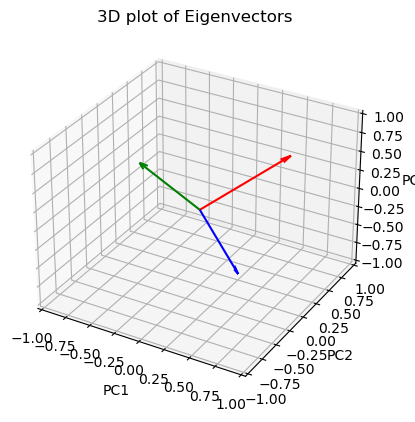

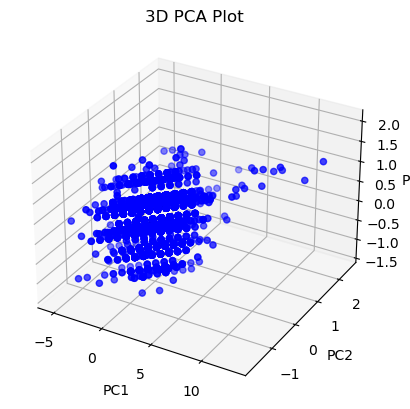

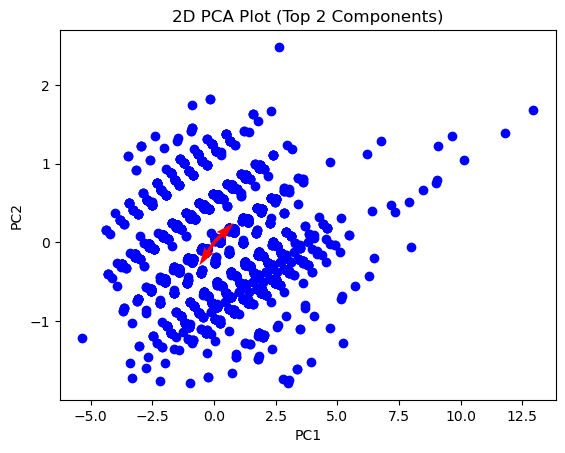

Covariance Matrix:
 [[11.86649854 10.49431936  6.10767371]
 [10.49431936 14.51416832  6.58836639]
 [ 6.10767371  6.58836639  5.66955033]] 

Correlation Matrix:
 [[1.         0.79964441 0.74462948]
 [0.79964441 1.         0.72628547]
 [0.74462948 0.72628547 1.        ]] 

Eigen Values:
 [2.5147544  0.28691857 0.19905963] 

Eigen Values Ratios:
 [0.83804682 0.09561617 0.06633701] 

Eigen Vectors:
 [[ 0.58507592  0.58058685  0.56621998]
 [-0.31086101 -0.48430748  0.81780909]
 [ 0.74903378 -0.65449612 -0.10287483]] 

Eigen Vectors of 2 Most Significant PCs:
 [[ 0.58507592  0.58058685  0.56621998]
 [-0.31086101 -0.48430748  0.81780909]] 



In [6]:
# Requirement 1

# TODO: Load the JPG image "Forest_1.jpg"
forest_image = io.imread('Forest_1.jpg')
print("Original Image Shape:", forest_image.shape)

# TODO: Convert the image to a 2D array of pixel values
height, width, channels = forest_image.shape
pixel_array = forest_image.reshape((height * width, channels))
print("2D Pixel Array Shape:",pixel_array.shape)

# TODO: Scale the data to have zero mean and unit variance along each feature axis.
scaler = StandardScaler()
scaler.fit(pixel_array)
scaled_pixel_array = scaler.transform(pixel_array)

# TODO: Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(scaled_pixel_array)
pca_pixel_array = pca.transform(scaled_pixel_array)

# TODO: Screen plot of the eigen vectors
eigen_vectors = pca.components_
eigen_values = pca.explained_variance_
eigent_values_rarios = pca.explained_variance_ratio_

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot eigenvectors in 3D
origin = [0, 0, 0]
ax.quiver(*origin, *eigen_vectors[0], length=1, color='r', arrow_length_ratio=0.1)
ax.quiver(*origin, *eigen_vectors[1], length=1, color='g', arrow_length_ratio=0.1)
ax.quiver(*origin, *eigen_vectors[2], length=1, color='b', arrow_length_ratio=0.1)

# Set plot limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Set labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


# Projection of the most significant eigen vectors on the 2D plane
# ax.view_init(-90,0)

# Show plot
plt.title('3D plot of Eigenvectors')
plt.show()

# Plot the PCA transformed data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the three principal components
pc1 = pca_pixel_array[:, 0]
pc2 = pca_pixel_array[:, 1]
pc3 = pca_pixel_array[:, 2]

ax.scatter(pc1, pc2, pc3, c='b', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot')
plt.show()

# TODO: Remove the lowest unimportant PC
most_significant_eigenvectors = eigen_vectors[0:2, :] # the least significant PC is PC3 since it has the lowest eigenvalue so we keep PC1 and PC2

# Plot the most significant eigenvectors in 2D 



# Plot the transformed data using only the first and second principal components
plt.scatter(pc1, pc2, c='b', marker='o')

plt.quiver(most_significant_eigenvectors[0][0], most_significant_eigenvectors[0][1], color='r')
plt.quiver(most_significant_eigenvectors[1][0], most_significant_eigenvectors[1][1], color='r')


# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Plot (Top 2 Components)')
# Show the plot
plt.show()

# TODO: Print the covariance matrix, eigenvalues, and eigen vectors and comment on the result.
print("Covariance Matrix:\n", np.cov(pixel_array.T), '\n') # transposed to get the covariance between the columns
print("Correlation Matrix:\n", np.corrcoef(pixel_array.T), '\n') # transposed to get the correlation between the columns
print("Eigen Values:\n", eigen_values,'\n')
print("Eigen Values Ratios:\n", eigent_values_rarios,'\n')

print("Eigen Vectors:\n", eigen_vectors,'\n')
print("Eigen Vectors of 2 Most Significant PCs:\n", most_significant_eigenvectors,'\n')



#### Comment on the Result

The covariance matrix before applying PCA shows the relationship between the 3 channels are positive linear relatioship as the covariance indicates the direction of the relationship beyween the varibales

To measure the strength between the variables we then obtain the correalation matrix which shows that the channels are highly correlated

When applying PCA we intend to reduce the dimensionality of the data while maintaining the components with the highest covariance and the least correlation so that the remaining dimensions should represent the original data as much as possible

After performing the PCA with the number of components = 3 we obtained 3 eigenvalues and subsequntly 3 eigenvectors. To decrease the dimension of the data we remove the channel with the smallest eigenvalue.

Plotting the 3D vectors in 3D space was easy, when we removed the least significant eigenvector the issue was that the two remaining vectors are 3D and we should plot them in 2D. (After searching I thought that we should view the 2 remaining eigenvectors as projections in the 2D plane in the dimensions of the 2 most significant PCs)


## R2- Apply PCA to satellite image

To implement PCA on a satellite image, the same afromentioned steps are undertaken:

### Requirements
- Apply PCA without loss.
- Show the covariance matrix.
- Show the Eigen Values and Vectors.
- Choose the three most significant axis.
- Plot the most significant eigen vectors in 3D.
- State the percentage of variance covered and provide commentary on its significance.
- Q: What can be achieved now by the transformed image?


Initial shape:  (64, 64, 13)
2D shape:  (4096, 13)


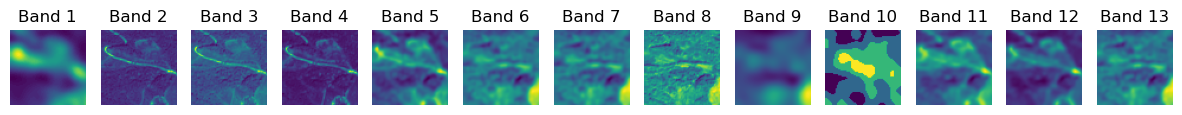

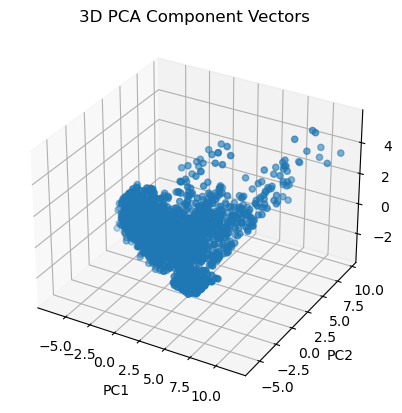

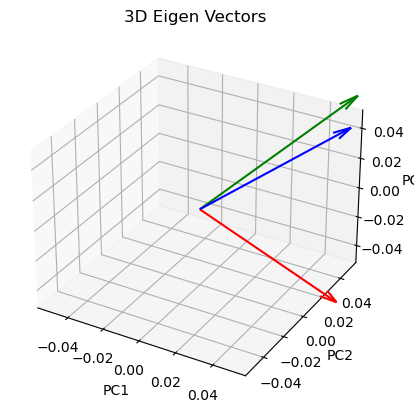

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Eigenvalues of shape  (3,)  :
 [7.54332163 3.086463   1.07704104]
Eigenvectors of shape  (3, 13)  :
 [[ 0.27905107  0.27052415  0.31410803  0.25405559  0.33760982  0.28017738
   0.25162706  0.23540699  0.27264042  0.12698374  0.33916944  0.30768365
   0.27269745]
 [ 0.19891474  0.28941058  0.16575029  0.34939187  0.1392072  -0.35428052
  -0.40163637 -0.35212191 -0.26083234  0.10598967  0.11964969  0.25827268
  -0.36965324]
 [-0.34760323  0.30050659  0.27732913  0.25560359 -0.02808972  0.03385167
   0.03715813  0.13139251 -0.13563819 -0.77328431 -0.07536644 -0.06210881
   0.01181151]]
Covariance Matrix of shape  (13, 13) :
 [[0.93840121 0.63091511 0.65598255 0.64691093 0.78957246 0.36010965
  0.27210328 0.2366361  0.45529603 0.57970124 0.79686535 0.80889365
  0.34285192]
 [0.63091511 1.00540726 0.850764   0.8812876  0.78823154 0.26838506
  0.17154226 0.20821166 0.28498211 0.1252201  0.76116362 0.82041565
  0.23395357]
 [0.65598255 0.850764   1.0151976  0.83001227 0.84703589 0.4877118
  

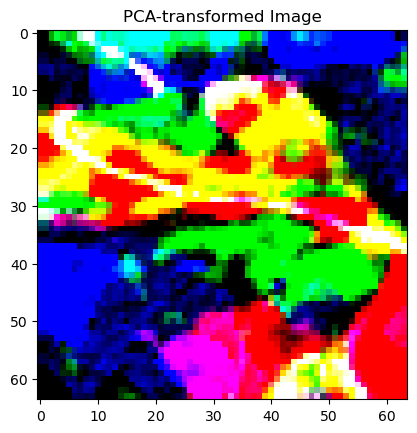

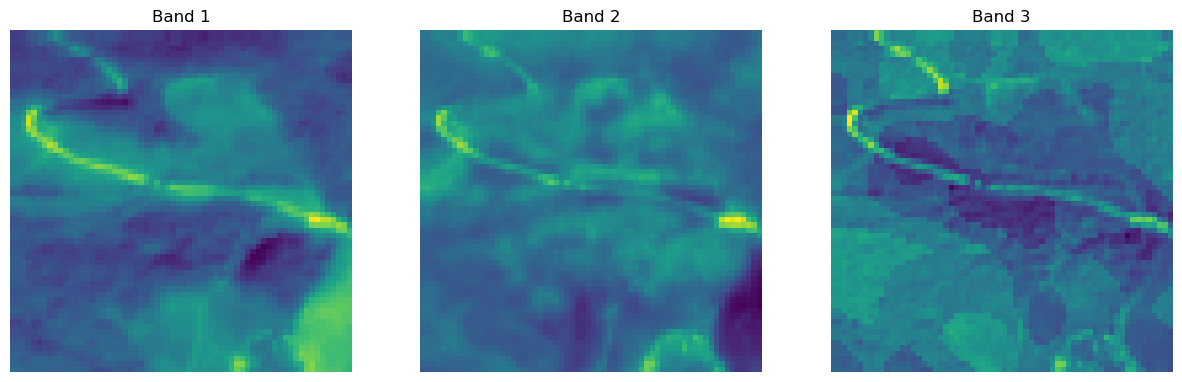

In [ ]:
# Requirement 2

# TODO: Load the TIF image "Forest_27.tif"
image = io.imread('Forest_27.tif')
print("Initial shape: ",image.shape)

# TODO: Convert the image to a 2D array of pixel values
height, width, channels = image.shape
image_2D = image.reshape((height * width, channels))
print("2D shape: ",image_2D.shape)
# print("Data:\n", image_2D[0])

	# Show bands of image
image_reshaped = image.reshape((height, width, channels))
fig, axs = plt.subplots(1, channels, figsize=(15, 5))
for i in range(channels):
    axs[i].imshow(image_reshaped[:, :, i])
    axs[i].set_title(f'Band {i+1}')
    axs[i].axis('off')
plt.show()


# TODO: Scale the data to have zero mean and unit variance along each feature axis.
scaler = StandardScaler()
scaled_image_2D = scaler.fit_transform(image_2D)
# print("Scaled Data:\n ", scaled_image_2D[0])

# TODO: Perform PCA 
pca = PCA(n_components = 3)
pca.fit(scaled_image_2D)

# TODO: Keep the 3 most significant PCs 
# pca.n_components = 3
pca_image = pca.fit_transform(scaled_image_2D)

# TODO: Plot the graph of the PCA vectors 
covariance_matrix = pca.get_covariance()
eigen_values, eigen_vectors =  pca.explained_variance_, pca.components_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_image[:,0], pca_image[:,1], pca_image[:,2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Component Vectors')
plt.show()

#Plot most significant eigen vectors in 3D.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = [0, 0, 0]
for i in range(3):  # Plotting first 3 eigenvectors
    ax.quiver(*origin, *eigen_vectors[i, 0], length=0.2, color=['r', 'g', 'b'][i], arrow_length_ratio=0.1)
ax.set_title('3D Eigen Vectors')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


# TODO: Print the covariance matrix, eigenvalues, and eigen vectors and comment on the result.
print("Eigenvalues of shape ", eigen_values.shape, " :\n", eigen_values)
print("Eigenvectors of shape ", eigen_vectors.shape, " :\n", eigen_vectors)
print("Covariance Matrix of shape ",covariance_matrix.shape , ":\n", covariance_matrix)


# State the percentage of variance covered and provide commentary on its significance.
print("Variance percentages ",pca.explained_variance_ratio_)

# Q: What can be achieved now by the transformed image?
transformed_image = pca_image.reshape(64, 64, 3)
plt.title("PCA-transformed Image")
print("Transformed Image shape: ", transformed_image.shape)
plt.imshow(transformed_image)
	# Show bands of image
height, width, channels = transformed_image.shape
image_reshaped = transformed_image.reshape((height, width, channels))
fig, axs = plt.subplots(1, channels, figsize=(15, 5))
for i in range(channels):
    axs[i].imshow(image_reshaped[:, :, i])
    axs[i].set_title(f'Band {i+1}')
    axs[i].axis('off')
plt.show()


### Comments on Requirement 2

The covariance matrix shows us the relationship between the channels/bands (here they are positive correlated)

We applied PCA to the satellite image, to reduce the image dimensionality while preserving the most significant information.
Hence, we can choose the most significant bands that have most info and visualize them better or analyze the image better without need for all the data as we have the ones containing most knowledge neeeded

This was indicated from the variance percentages as well

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
